# Sentimental Analisys 

In [75]:
from src.utils import gets_groups, sentimental_analisys_user
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Get user group means

Let's see an example of how to use our API. We are going to get the character Harry Potter and the groups referencing the scenes of the movie "Harry Potter and the Philosopher's Stone".

In [67]:
harry = gets_groups("Harry Potter") #gets the groups where the user belongs.

In [73]:
harry_potter = sentimental_analisys_user(harry, "Harry Potter") #get the sentimental mean from each group

In [82]:
df_harry = pd.DataFrame({"group":harry, "sentimental_analisys":harry_potter}) #creates DataFrame

In [84]:
df_harry.head()

,group,sentimental_analisys
0,2,0.097512
1,3,0.032300
2,4,0.015946
3,5,0.205850
4,6,-0.034233


<BarContainer object of 33 artists>

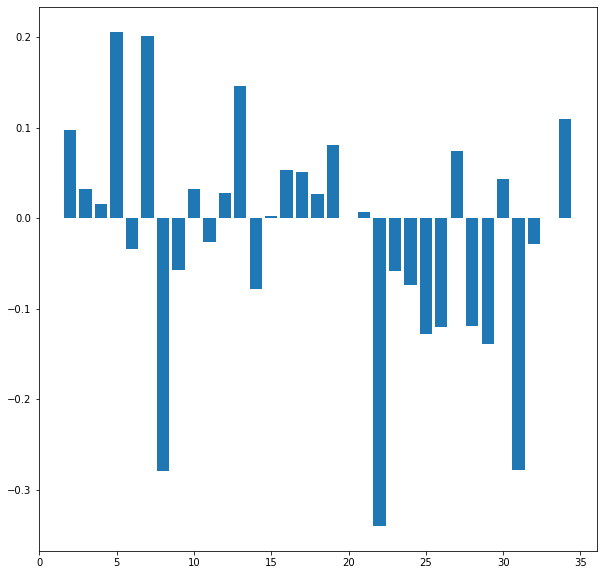

In [110]:
fig, ax = plt.subplots(figsize=(10,10))
plt.bar(df_harry.group, df_harry.sentimental_analisys)
#plots the results

Let's see an example of how to use our API. We are going to get the character Harry Potter and the groups referencing the scenes of the movie "Harry Potter and the Philosopher's Stone".

## Compare with the other users

Let's compare the averages of different characters with that of Harry Potter. Let's see if we get any surprises.

In [145]:
characters = {}
for char in ["Hermione Granger", "Harry Potter", "Ron Weasley", "Severus Snape", "Albus Dumbledore", "Minerva McGonagall", "Draco Malfoy"]:
    try:
        params = {"name":f"{char}"}
        response = requests.get("http://127.0.0.1:5000/sentimentalAnalisys/mean", params = params).json()
        characters[f"{char}"] = response
    except:
        None
#takes means about characters

In [146]:
characters

{'Hermione Granger': 0.021633695652173913,
 'Harry Potter': -0.003948695652173916,
 'Ron Weasley': 0.017946666666666666,
 'Severus Snape': 0.3506777777777777,
 'Albus Dumbledore': 0.3511666666666666,
 'Minerva McGonagall': 0.21307419354838714,
 'Draco Malfoy': 0.027092307692307697}

<BarContainer object of 7 artists>

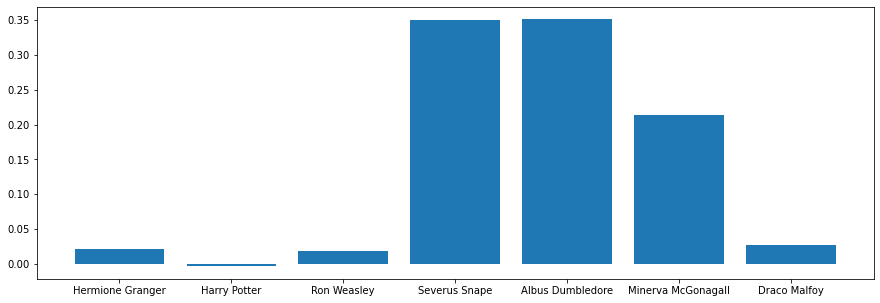

In [147]:
fig, ax = plt.subplots(figsize=(15,5))
plt.bar(characters.keys(), characters.values())
#plots them

Well, we do have surprises. Against all odds, we see how Severus Snape's stocking is one of the most positively charged, along with Albus Dumbledore. On the other hand, Harry Potter is the one with the most negative average. 